In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
print(train_images.shape)
print(train_images[0].shape)
x=train_images[0].flatten()
print(x.shape)

(60000, 28, 28)
(28, 28)
(784,)


In [3]:
print(train_images.shape[0])

60000


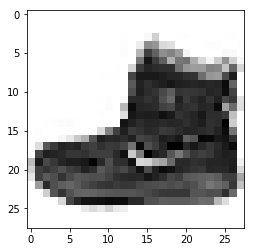

In [4]:
plt.imshow(x.reshape(28,28),cmap='Greys')
plt.show()

In [5]:
test_images=np.array(train_images[i].flatten() for i in range(train_images.shape[0]))
#for i in range(train_images.shape[0]): test_images=np.append(test_images,train_images[i].flatten())

In [6]:
#will have two hidden nodes
#first two nodes are encoder
#last two nodes are decoder
n_nodes_inp1=784#encoder
n_nodes_hl1=32
n_nodes_hl2=32#decoder
n_nodes_out1=784

In [7]:
#now assigning random values to weights and biases for each layer
#putting weights and biases in dictionaries
#if a model is
# FULLY CONNECTED
# layer one has m nodes
# layer two has n nodes
#then their connection has m*n weights and n biases
#first hidden layer is input to first hidden layer, 32 nodes -> 784*32 weights and 32 biases
hidden_1_layer_vals={'weights':tf.Variable(tf.random_normal([n_nodes_inp1,n_nodes_hl1])),
        'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}
#second hidden layer is first hidden layer to second hidden layer, 32 nodes -> 32*32 weights and 32 biases
hidden_2_layer_vals={'weights':tf.Variable(tf.random_normal([n_nodes_hl1,n_nodes_hl2])),
        'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

In [8]:
#output layer is second hidden layer to output, 784 nodes, 32*784 weights and 784 biases
output_layer_vals={'weights':tf.Variable(tf.random_normal([n_nodes_hl2,n_nodes_out1])),
        'biases':tf.Variable(tf.random_normal([n_nodes_out1]))}

In [9]:
#now defining neural net
#input layer first
input_layer=tf.placeholder('float',[None,784])
#multiply output of input_layer with a weight matrix and add biases
layer_1=tf.nn.sigmoid(
    tf.add(tf.matmul(input_layer,hidden_1_layer_vals['weights']),
        hidden_1_layer_vals['biases']))
#multiply output of layer_1 with a weight matrix and add biases
layer_2=tf.nn.sigmoid(
    tf.add(tf.matmul(layer_1,hidden_2_layer_vals['weights']),
        hidden_2_layer_vals['biases']))
#multiply output of layer_2 with a weight matrix and add biases
output_layer=tf.nn.sigmoid(
    tf.add(tf.matmul(layer_2,output_layer_vals['weights']),
        output_layer_vals['biases']))

In [10]:
#output test will have the original images
output_test=tf.placeholder('float',[None,784])
#cost function
meansq=tf.reduce_mean(tf.square(output_layer-output_test))
#define our optimizer
learn_rate=0.1
optimizer=tf.train.AdagradOptimizer(learn_rate).minimize(meansq)

In [14]:
#setting up net
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)
batch_size=100#how many images to use together for training
hm_epochs=1000#how many times to go through the entire dataset
tot_images=60000

In [15]:
#for i in range(train_images.size): train_images[i]=train_images[i].flatten();
train_images.flatten()
print(train_images.shape)

(60000, 28, 28)


In [18]:
#running net
for epoch in range(hm_epochs):
    epoch_loss=0#error initialized at 0
    for i in range(int(tot_images/batch_size)):
        epoch_x=train_images[i*batch_size:(i+1)*batch_size]
        epoch_x=np.reshape(epoch_x, (100,784))
        _, c=sess.run([optimizer,meansq],
                feed_dict={input_layer:epoch_x,
                    output_test:epoch_x})
        epoch_loss+=c
    print('Epoch ',epoch,'/',hm_epochs,'loss: ',epoch_loss)

Epoch  0 / 1000 loss:  7968410.3271484375
Epoch  1 / 1000 loss:  7968211.35546875
Epoch  2 / 1000 loss:  7968164.4375
Epoch  3 / 1000 loss:  7968164.1806640625
Epoch  4 / 1000 loss:  7968163.87109375
Epoch  5 / 1000 loss:  7968163.6318359375
Epoch  6 / 1000 loss:  7968163.4619140625
Epoch  7 / 1000 loss:  7968162.9384765625
Epoch  8 / 1000 loss:  7968160.28125
Epoch  9 / 1000 loss:  7968159.6513671875
Epoch  10 / 1000 loss:  7968159.5537109375
Epoch  11 / 1000 loss:  7968159.517578125
Epoch  12 / 1000 loss:  7968159.498046875
Epoch  13 / 1000 loss:  7968159.4873046875
Epoch  14 / 1000 loss:  7968159.48828125
Epoch  15 / 1000 loss:  7968159.4765625
Epoch  16 / 1000 loss:  7968159.404296875
Epoch  17 / 1000 loss:  7968156.39453125
Epoch  18 / 1000 loss:  7968147.7490234375
Epoch  19 / 1000 loss:  7968083.5224609375
Epoch  20 / 1000 loss:  7967894.775390625
Epoch  21 / 1000 loss:  7967886.0654296875
Epoch  22 / 1000 loss:  7967886.0009765625
Epoch  23 / 1000 loss:  7967885.998046875
Epoch

Epoch  194 / 1000 loss:  7967674.748046875
Epoch  195 / 1000 loss:  7967674.859375
Epoch  196 / 1000 loss:  7967674.4892578125
Epoch  197 / 1000 loss:  7967673.5703125
Epoch  198 / 1000 loss:  7967673.15625
Epoch  199 / 1000 loss:  7967672.873046875
Epoch  200 / 1000 loss:  7967672.7626953125
Epoch  201 / 1000 loss:  7967672.9638671875
Epoch  202 / 1000 loss:  7967672.9208984375
Epoch  203 / 1000 loss:  7967672.287109375
Epoch  204 / 1000 loss:  7967671.837890625
Epoch  205 / 1000 loss:  7967671.4765625
Epoch  206 / 1000 loss:  7967671.4970703125
Epoch  207 / 1000 loss:  7967671.2060546875
Epoch  208 / 1000 loss:  7967670.888671875
Epoch  209 / 1000 loss:  7967670.5146484375
Epoch  210 / 1000 loss:  7967670.1396484375
Epoch  211 / 1000 loss:  7967670.0478515625
Epoch  212 / 1000 loss:  7967669.2119140625
Epoch  213 / 1000 loss:  7967669.150390625
Epoch  214 / 1000 loss:  7967669.0087890625
Epoch  215 / 1000 loss:  7967668.8203125
Epoch  216 / 1000 loss:  7967668.25
Epoch  217 / 1000 lo

KeyboardInterrupt: 

[[1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1.
  0. 0. 1. 1. 0. 1. 1. 0.]]


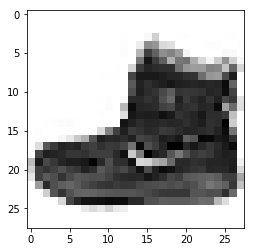

In [21]:
image=train_images[0].flatten()
output_image=sess.run(output_layer,
        feed_dict={input_layer:[image]})
encoded_image=sess.run(layer_1,
        feed_dict={input_layer:[image]})
#print the original image
plt.imshow(image.reshape(28,28),cmap='Greys')
plt.show
#print encoding
print(encoded_image)

In [22]:
print(encoded_image.size)

32


<function matplotlib.pyplot.show(*args, **kw)>

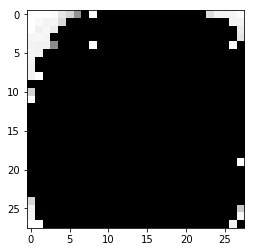

In [23]:
plt.imshow(output_image.reshape(28,28),cmap='Greys')
plt.show